In [2]:
%load_ext autoreload
%autoreload 2

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats

import sys
sys.path.append('./src')

import simulation as sim
import constant as ct
from TwoPopulationSimulation import TwoPopulationSimulation

## 2.1

The weights affecting neurons in the left and right population are $w_{L \to L}, w_{R \to L}$ and $w_{R \to R}, w_{L \to R}$ respectively, all defined as:
\begin{align*}
    w&_{A \to L}(x^L_i, x^A_j) = \cos(x^L_i + \theta - x^A_j) \\
    &= \cos{(x^L_i+\theta)}\cos{(x^A_j)}+\sin{(x^L_i+\theta)}\sin{(x^A_j)} \\
    w&_{A \to R}(x^R_i, x^A_j) = \cos(x^R_i - \theta - x^A_j) \\
    &= \cos{(x^R_i-\theta)}\cos{(x^A_j)}+\sin{(x^R_i-\theta)}\sin{(x^A_j)}
\end{align*}
where $A \in \{L, R\}$. The inputs of the left and right population are given by the following expressions. For simplicity we ignore the external stimulation $I^A_{\text{ext}, i}(t)$ for both populations and abbreviate the notation using $w_{A \to B}(x^B_i, x^A_j)=w_{A \to B}$.
\begin{align*}
    I^L_i(t)&=\frac{J}{N}\sum_{j=1}^N \left[ w_{L \to L} S^L_j(t) + w_{R \to L} S^R_j(t) \right] \\
    &= J \big(\cos{(x^L_i+\theta)} [m^L_{\cos} (t) + m^R_{\cos} (t)] \\
    &\qquad + \sin{(x^L_i+\theta)} [m^L_{\sin} (t) + m^R_{\sin} (t)]\big) \\
    I^R_i(t) &= J (\cos{(x^R_i-\theta)} [m^L_{\cos} (t) + m^R_{\cos} (t)] \\
    &\qquad+ \sin{(x^R_i-\theta)} [m^L_{\sin} (t) + m^R_{\sin} (t)])
\end{align*}
where $m^A_{f}(t) = \frac{1}{N}\sum_{j=1}^N f(x^L_j)S^A_j(t)$ with $A \in \{L, R\}$ and $f(x)=\{\sin{(x)}, \cos{(x)}\}$. This connectivity can be considered a "pull-push system" in the stable configuration.

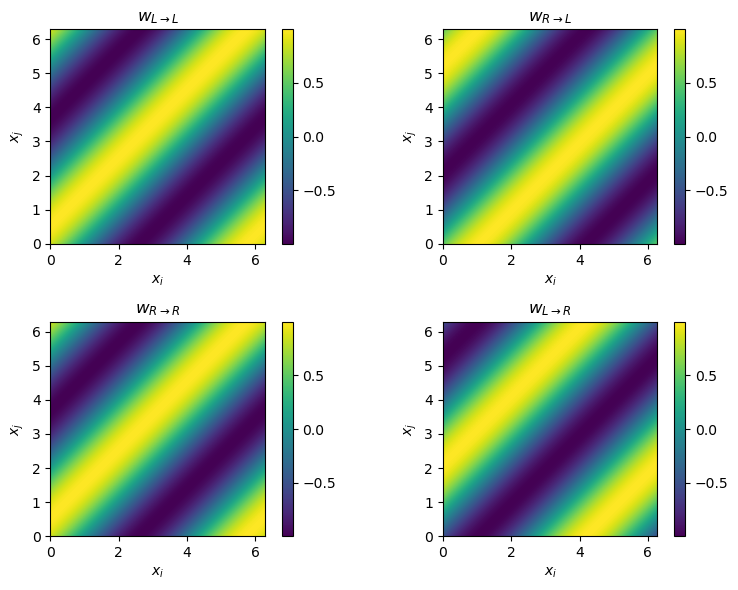

In [20]:
import numpy as np
import matplotlib.pyplot as plt

theta = 30 * np.pi / 180
xL = np.linspace(0, 2 * np.pi, 300)
xR = np.linspace(0, 2 * np.pi, 300)
xL_grid, xR_grid = np.meshgrid(xL, xR)

wLL = np.cos(xL_grid + theta - xL_grid) # cos(x)  max at x = 0    -> when xL - xR = -theta
wRL = np.sin(xL_grid + theta - xR_grid) # sin(x)  max at x = 90°  -> when xL - xR = -theta + 90° = 60°
wRR = np.cos(xR_grid - theta - xR_grid) # cos(-x) max at x = 0    -> when xL - xR = -theta
wLR = np.sin(xR_grid - theta - xL_grid) # sin(-x) max at x = -90° -> when xL - xR = -theta - 90° = -120°

w = [wLL, wRL, wRR, wLR]
w_title = [r'$w_{L \to L}$', r'$w_{R \to L}$', r'$w_{R \to R}$', r'$w_{L \to R}$']

plt.figure(figsize=(8, 6))

for i in range(len(w)):
    plt.subplot(2, 2, i+1)
    plt.imshow(w[i], origin='lower', extent=(0, 2*np.pi, 0, 2*np.pi))
    plt.title(w_title[i])
    plt.xlabel(r'$x_i$')
    plt.ylabel(r'$x_j$')
    plt.colorbar()

plt.tight_layout()
plt.show()


## 2.2

In [19]:
# fix seed
np.random.seed(1)

100%|██████████| 9999/9999 [00:03<00:00, 2771.09it/s]


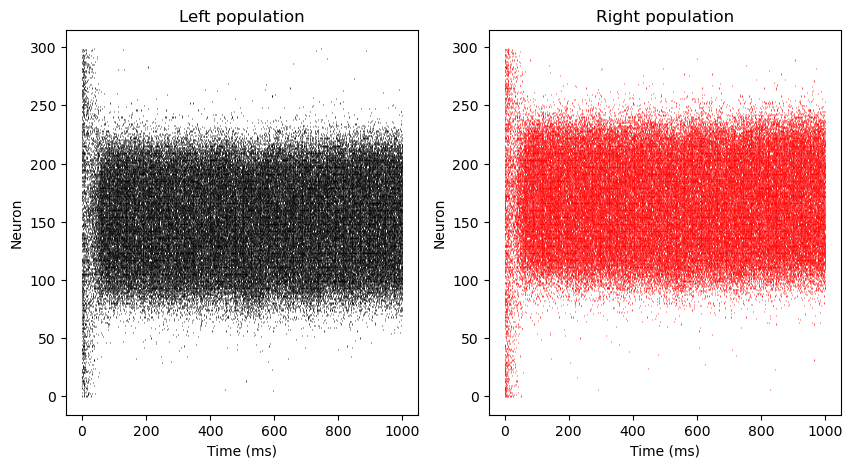

In [20]:
J = 3
theta = 10*np.pi/180

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

network = TwoPopulationSimulation(J = J, theta = theta)

hL,sL, hR, sR = network.simulation(initial_voltage=network.uniform_voltage)
sL1, sR1 = sim.bins_spike(sL, 1), sim.bins_spike(sR, 1)

spike_timesL = [np.where(sL1.T[i] !=0)[0] for i in range(ct.N)]
spike_timesR = [np.where(sR1.T[i] !=0)[0] for i in range(ct.N)]

ax[0].eventplot(spike_timesL, orientation='horizontal', color='black', linewidth=0.5)
ax[1].eventplot(spike_timesR, orientation='horizontal', color='red', linewidth=0.5)
ax[0].set_title(f'Left population')
ax[1].set_title(f'Right population')
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[0].set_ylabel("Neuron")
ax[1].set_ylabel("Neuron")
plt.show()
    

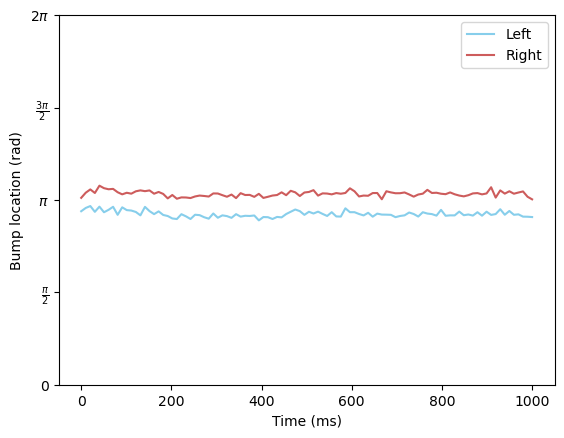

In [37]:
sL10 = sim.bins_spike(sL, 10)
sR10 = sim.bins_spike(sR, 10)


bump_locationL = sim.get_bump(sL10, N = ct.N)
bump_locationR = sim.get_bump(sR10, N = ct.N)

time = np.linspace(0, 1000, len(bump_locationL), endpoint=True)
plt.plot(time, bump_locationL, label='Left', color='black')
plt.plot(time, bump_locationR, label='Right', color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Bump location (rad)')
plt.yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.legend()
plt.show()

In [3]:
J = 3
theta = 10*np.pi/180

madL = []
madR = []

for i in range(100):

    network = TwoPopulationSimulation(J = J, theta = theta)

    hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)
    sL1, sR1 = sim.bins_spike(sL, 1), sim.bins_spike(sR, 1)

    spike_timesL = [np.where(sL1.T[i] !=0)[0] for i in range(ct.N)]
    spike_timesR = [np.where(sR1.T[i] !=0)[0] for i in range(ct.N)]

    sL10 = sim.bins_spike(sL, 10)
    sR10 = sim.bins_spike(sR, 10)

    bump_locationL = sim.get_bump(sL10, N = ct.N)
    bump_locationR = sim.get_bump(sR10, N = ct.N)

    madL.append(stats.median_abs_deviation(bump_locationL))
    madR.append(stats.median_abs_deviation(bump_locationR))

# print(f'MAD for left population: {madL}')
# print(f'MAD for right population: {madR}')

100%|██████████| 100/100 [07:31<00:00,  4.51s/it]


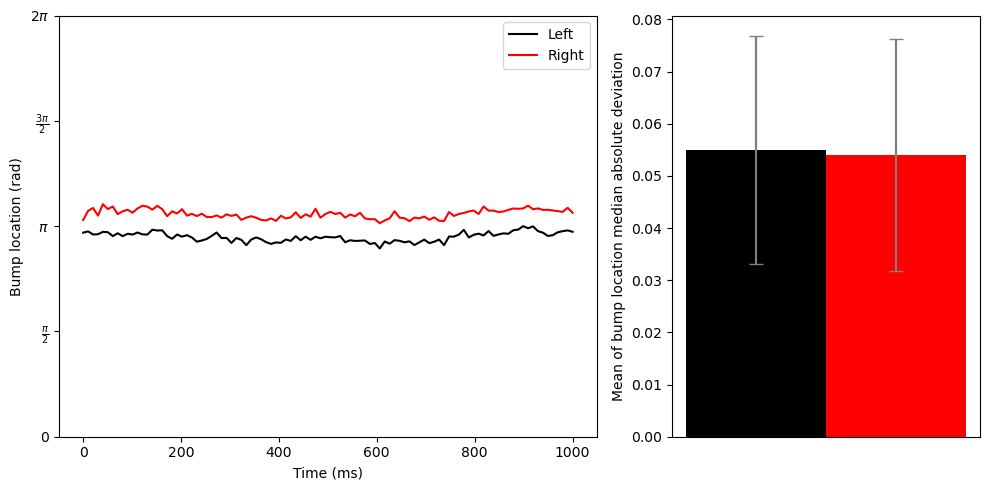

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a 1x2 grid of subplots with different widths
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3.5, 2]) 

ax0 = plt.subplot(gs[0])
time = np.linspace(0, 1000, len(bump_locationL), endpoint=True)
ax0.plot(time, bump_locationL, label='Left', color='black')
ax0.plot(time, bump_locationR, label='Right', color='red')
ax0.set_xlabel('Time (ms)')
ax0.set_ylabel('Bump location (rad)')
ax0.set_yticks(np.linspace(0,2*np.pi,5, endpoint=True))
ax0.set_yticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax0.legend()

ax1 = plt.subplot(gs[1])
bar1 = ax1.bar(0,np.mean(madL), 0.05, yerr=np.std(madL), label='Left', color='black')
bar2 = ax1.bar(0.05,np.mean(madR), 0.05, yerr=np.std(madR), label='Right', color='red')
ax1.errorbar(bar1.patches[0].get_x() + bar1.patches[0].get_width() / 2, bar1.patches[0].get_height(), yerr=np.std(madL), fmt='none', capsize=5, color='grey')
ax1.errorbar(bar2.patches[0].get_x() + bar2.patches[0].get_width() / 2, bar2.patches[0].get_height(), yerr=np.std(madR), fmt='none', capsize=5, color='grey')
ax1.set_ylabel('Mean of bump location median absolute deviation')

# Remove x ticks
ax1.set_xticks([])

plt.tight_layout()
plt.savefig('./plots/2_2', dpi=600)
plt.show()

In [9]:
# we expect the absolute mean bump location difference to be 20° because theta is 10°
print(np.abs(np.mean(bump_locationL)-np.mean(bump_locationR))/np.pi*180)

19.79837380259302


## 2.3

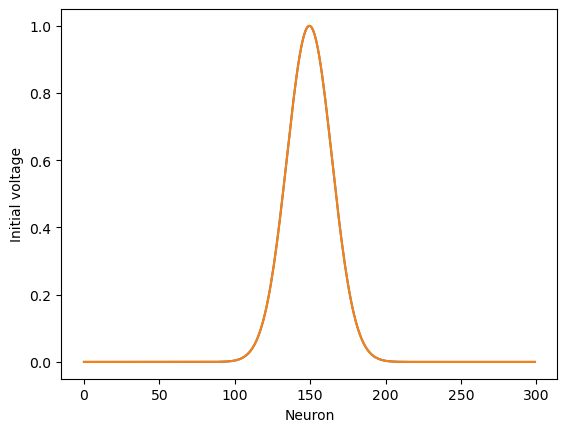

In [8]:
initial_voltage = np.linspace(0, 1, ct.N)
initial_voltage = np.exp(-0.5 * ((initial_voltage - 0.5) / 0.05) ** 2)

# same but centered around the right location
initial_voltage2 = np.linspace(0, 2*np.pi, ct.N)
initial_voltage2 =  np.exp(-0.5 * ((initial_voltage2 - np.pi) / (np.pi/10)) ** 2)
# initial_voltage += np.random.uniform(-0.1, 0.1, ct.N) # pas obligé d'apres l'assistant !

plt.plot(initial_voltage)
plt.plot(initial_voltage2)
plt.xlabel('Neuron')
plt.ylabel('Initial voltage')
plt.show()

In [30]:
J = 3
theta = 10*np.pi/180
bump_location_means = []

for n in tqdm(range(100)):
    network = TwoPopulationSimulation(J = J, theta = theta)

    hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)

    sL10 = sim.bins_spike(sL, 10)
    sR10 = sim.bins_spike(sR, 10)

    bump_locationL = np.array(sim.get_bump(sL10))
    bump_locationR = np.array(sim.get_bump(sR10))
    bump_location_means.append(np.mean((bump_locationL+bump_locationR)/2)/np.pi*180)


100%|██████████| 100/100 [03:24<00:00,  2.04s/it]


In [31]:
# we expect the mean bump location to be around 180°
print(f'{np.mean(bump_location_means)} +/- {np.std(bump_location_means)}')

180.5426351867631 +/- 6.204989864919356


175.19497718353657


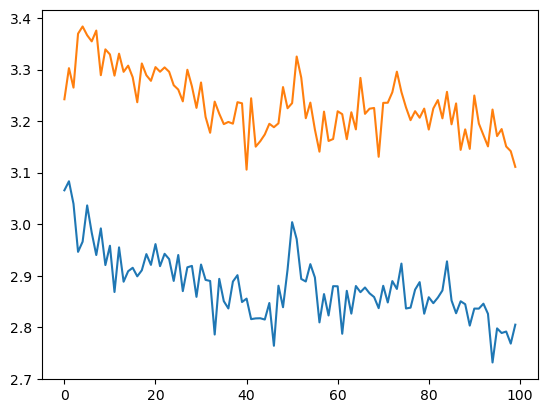

In [29]:
network = TwoPopulationSimulation(J = J, theta = theta)

hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)

sL10 = sim.bins_spike(sL, 10)
sR10 = sim.bins_spike(sR, 10)

bump_locationL = np.array(sim.get_bump(sL10))
bump_locationR = np.array(sim.get_bump(sR10))
print(np.mean((bump_locationL+bump_locationR)/2)/np.pi*180)

plt.plot(bump_locationL)
plt.plot(bump_locationR)
plt.show()

## 2.4

100%|██████████| 9999/9999 [00:02<00:00, 3663.79it/s]
8it [00:28,  3.59s/it]


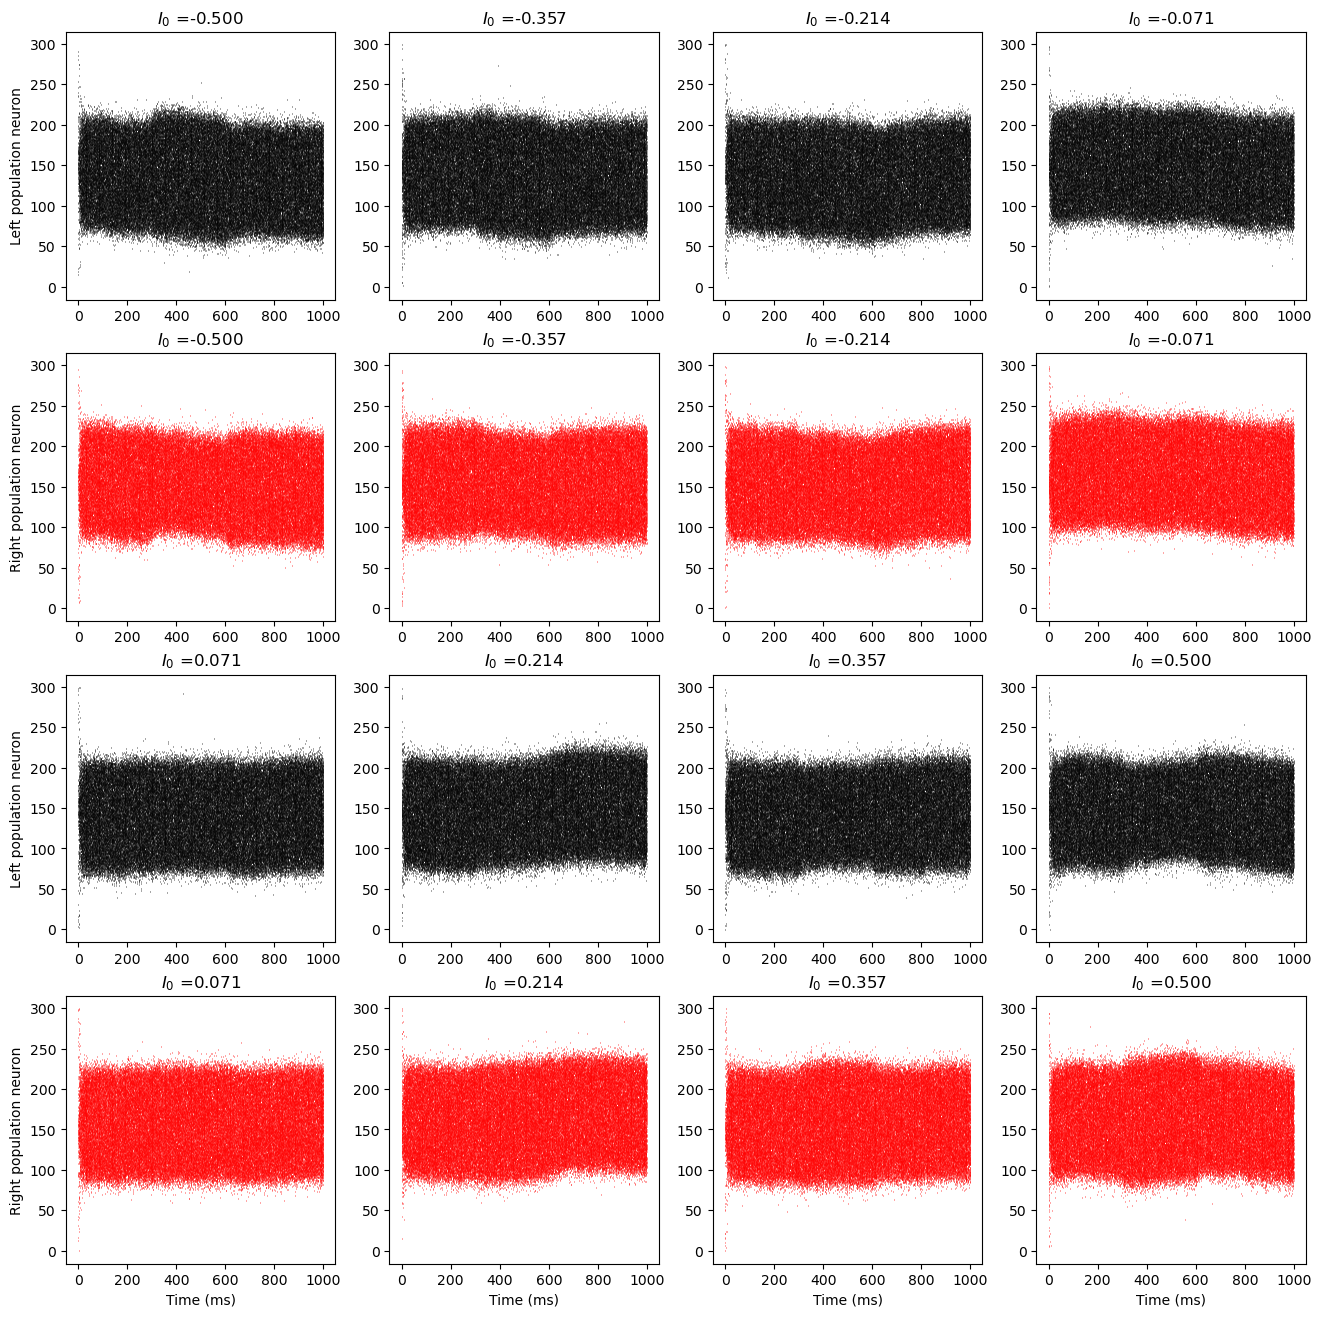

In [10]:
np.random.seed(0)

J = 3
theta = 10*np.pi/180
I0_values = np.linspace(-0.5, 0.5, 8)

fig, ax = plt.subplots(4, 4, figsize=(16, 16))

for i, I0 in tqdm(enumerate(I0_values)):
    x, y = i//4, i%4
    network = TwoPopulationSimulation(J = 5, theta = theta, I0 = I0, I_ext = True)

    hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)

    sL1, sR1 = sim.bins_spike(sL, 1), sim.bins_spike(sR, 1)
    spike_timesL = [np.where(sL1.T[i] !=0)[0] for i in range(ct.N)]
    spike_timesR = [np.where(sR1.T[i] !=0)[0] for i in range(ct.N)]

    ax[2*x, y].eventplot(spike_timesL, orientation='horizontal', color='black', linewidth=0.5)
    ax[2*x+1, y].eventplot(spike_timesR, orientation='horizontal', color='red', linewidth=0.5)
    ax[2*x, y].set_title(r'$I_0$ =' + f'{I0:.3f}')
    ax[2*x+1, y].set_title(r'$I_0$ =' + f'{I0:.3f}')

for i in range(2):
    ax[2*i, 0].set_ylabel("Left population neuron")
    ax[2*i+1, 0].set_ylabel("Right population neuron")

for i in range(4): ax[3, i].set_xlabel('Time (ms)')
    

plt.show()

In [4]:
J = 3
theta = 10*np.pi/180
I0_values = np.linspace(-1.5, 1.5, 51)

bump_means = []

for i, I0 in tqdm(enumerate(I0_values)):
    network = TwoPopulationSimulation(J = J, theta = theta, I0 = I0, I_ext=True)

    hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)

    sL = sim.bins_spike(sL, 10)
    sR = sim.bins_spike(sR, 10)
    
    bump_R = np.array(sim.get_bump(sR, N = ct.N))
    bump_L = np.array(sim.get_bump(sL, N = ct.N))

    bump_means.append(np.mean((bump_L+bump_R)/2))


51it [02:39,  3.13s/it]


R squared = 0.9282829034634155


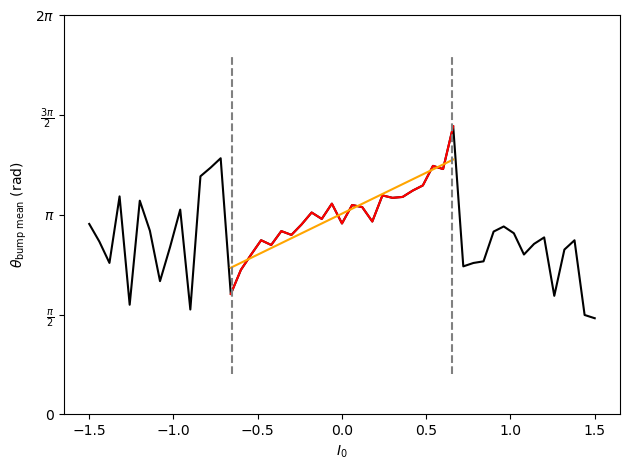

In [33]:
plt.plot(I0_values, bump_means, c='black')
linear_interval = (I0_values > -0.67) & (I0_values < 0.67)
linear_bump_means = np.array(bump_means)[linear_interval]
linear_I0_values = np.array(I0_values)[linear_interval]
a, b, r_value, p_value, std_err = stats.linregress(linear_I0_values, linear_bump_means)
print('R squared =', r_value)

plt.plot(I0_values, np.where(linear_interval, bump_means, None), c='red')
plt.plot(linear_I0_values, a*linear_I0_values+b, c='orange')
plt.axvline(0.65, ymin=0.1, ymax=0.9, ls='--', c='grey')
plt.axvline(-0.65, ymin=0.1, ymax=0.9, ls='--', c='grey')
plt.xlabel(r'$I_0$')
plt.ylabel(r'$\theta_\text{bump mean}$ (rad)')
plt.yticks(np.linspace(0, 2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.tight_layout()
#plt.savefig('./plots/2_4', dpi=600)
plt.show()

Linear : between -0.5 nA and 0.5 nA.